This tool creates ML models with the given datasets to detect video vs. regular browsing.

In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

Our labels, separated by category.

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']


scalogram_1 = ['up_bytes_1max_y', 'up_bytes_1max_x', 'up_bytes_1min_y', 'up_bytes_1min_x',  
    'up_packet_1max_y', 'up_packet_1max_x', 'up_packet_1min_y', 'up_packet_1min_x', 'down_bytes_1max_y',
    'down_bytes_1max_x',    'down_bytes_1min_y', 'down_bytes_1min_x', 'down_packet_1max_y',
    'down_packet_1max_x', 'down_packet_1min_y', 'down_packet_1min_x']

scalogram_2 = ['up_bytes_2max_y', 'up_bytes_2max_x', 'up_bytes_2min_y', 'up_bytes_2min_x',  
    'up_packet_2max_y', 'up_packet_2max_x', 'up_packet_2min_y', 'up_packet_2min_x', 'down_bytes_2max_y',
    'down_bytes_2max_x',    'down_bytes_2min_y', 'down_bytes_2min_x', 'down_packet_2max_y',
    'down_packet_2max_x','down_packet_2min_y','down_packet_2min_x']

scalogram_3 = ['up_bytes_3max_y', 'up_bytes_3max_x', 'up_bytes_3min_y', 'up_bytes_3min_x',  
    'up_packet_3max_y', 'up_packet_3max_x', 'up_packet_3min_y', 'up_packet_3min_x', 'up_packet_3min_y',
    'down_bytes_3max_y', 'down_packet_3min_y', 'down_bytes_3max_x', 'down_bytes_3min_y',
    'down_bytes_3min_x', 'down_packet_3max_y','down_packet_3max_x','down_packet_3min_y','down_packet_3min_x']
scalogram_4 = ['up_bytes_4max_y', 'up_bytes_4max_x', 'up_bytes_4min_y', 'up_bytes_4min_x',  
    'up_packet_4max_y', 'up_packet_4max_x', 'up_packet_4min_y', 'up_packet_4min_x', 'down_bytes_4max_y',
    'down_bytes_4max_x',    'down_bytes_4min_y', 'down_bytes_4min_x', 'down_packet_4max_y',
    'down_packet_4max_x','down_packet_4min_y','down_packet_4min_x']
scalogram_5 = ['up_bytes_5max_y', 'up_bytes_5max_x', 'up_bytes_5min_y', 'up_bytes_5min_x',  
    'up_packet_5max_y', 'up_packet_5max_x', 'up_packet_5min_y', 'up_packet_5min_x', 'down_bytes_5max_y',
    'down_bytes_5max_x',    'down_bytes_5min_y', 'down_bytes_5min_x', 'down_packet_5max_y',
    'down_packet_5max_x','down_packet_5min_y','down_packet_5min_x']

scalogram = scalogram_1 + scalogram_2 + scalogram_3 + scalogram_4 + scalogram_5

Load the dataset.

In [4]:
base_folder = "csv/"
file_name = 'all_60s_1s_32.csv'

dataset = pd.read_csv(os.path.join(str(base_folder), str(file_name)))

dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'] + scalogram_5 + scalogram_4 + scalogram_3, inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90', 'up_bytes_silences',
       'up_bytes_silence_mean', 'up_bytes_longest_silence',
       'up_bytes_shortest_silence', 'up_packet_mean', 'up_packet_median',
       'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
       'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75',
       'up_packet_perc90', 'up_packet_silences', 'up_packet_longest_silence',
       'up_packet_shortest_silence', 'up_bytes_1max_y', 'up_bytes_2max_y',
       'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_1min_y',
       'up_bytes_2min_y', 'up_bytes_1min_x', 'up_bytes_2min_x',
       'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_1max_x',
       'up_packet_2max_x', 'up_packet_1min_y', 'up_packet_2min_y',
       'up_packet_1min_x', 'up_packet_2min_x', 'down_bytes_mean',
       'down_bytes_me

Choose the labels to consider.

In [5]:
dataset.loc[dataset['label'] == 'reddit', 'label'] = 'browsing'
dataset.loc[dataset['label'] == 'facebook', 'label'] = 'browsing'

dataset_tunnel = dataset[dataset['label'] == 'netflix-openvpn']
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'netflix-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'youtube-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'youtube-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'twitch-ssh'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'twitch-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'acestream-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'browsing-openvpn'])
dataset_tunnel = dataset_tunnel.append(dataset[dataset['label'] == 'browsing'])

# Prepare tunnel dataset for testing
dataset_tunnel.loc[dataset_tunnel['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset_tunnel.loc[dataset_tunnel['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset_tunnel.loc[dataset_tunnel['label'] == 'twitch-ssh', 'label'] = 'twitch'
dataset_tunnel.loc[dataset_tunnel['label'] == 'netflix-openvpn', 'label'] = 'netflix'
dataset_tunnel.loc[dataset_tunnel['label'] == 'youtube-openvpn', 'label'] = 'youtube'
dataset_tunnel.loc[dataset_tunnel['label'] == 'twitch-openvpn', 'label'] = 'twitch'
dataset_tunnel.loc[dataset_tunnel['label'] == 'acestream-openvpn', 'label'] = 'acestream'
dataset_tunnel.loc[dataset_tunnel['label'] == 'browsing-openvpn', 'label'] = 'browsing'


# Join applications from different capture settings
dataset_normal = dataset[dataset['label'] == 'netflix']
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'youtube'])
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'twitch'])
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'acestream'])
dataset_normal = dataset_normal.append(dataset[dataset['label'] == 'browsing'])

# Video vs. Rest
dataset_tunnel.loc[dataset_tunnel['label'] == 'netflix', 'label'] = 'video'
dataset_tunnel.loc[dataset_tunnel['label'] == 'youtube', 'label'] = 'video'
dataset_tunnel.loc[dataset_tunnel['label'] == 'twitch', 'label'] = 'video'
dataset_tunnel.loc[dataset_tunnel['label'] == 'acestream', 'label'] = 'video'


dataset_normal.loc[dataset_normal['label'] == 'netflix', 'label'] = 'video'
dataset_normal.loc[dataset_normal['label'] == 'youtube', 'label'] = 'video'
dataset_normal.loc[dataset_normal['label'] == 'twitch', 'label'] = 'video'
dataset_normal.loc[dataset_normal['label'] == 'acestream', 'label'] = 'video'


print(dataset_tunnel.shape[0])
print(dataset_tunnel['label'].value_counts())
print(dataset_normal.shape[0])
print(dataset_normal['label'].value_counts())
number_training_samples = dataset_normal.shape[0]
dataset = dataset_normal.append(dataset_tunnel)

683
video       387
browsing    296
Name: label, dtype: int64
621
video       385
browsing    236
Name: label, dtype: int64


In [6]:
import numpy as np
browsing = dataset[dataset['label'] == 'browsing']
video = dataset[dataset['label'] == 'video']

Factorize the labels.

In [7]:
prevlabel = dataset['label']
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
dataset['label'].value_counts()

0    772
1    532
Name: label, dtype: int64

Check correlation matrix.

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
down_bytes_skew                0.545467
down_bytes_kurt                0.501314
down_packet_skew               0.443305
down_bytes_1min_y              0.425343
up_packet_skew                 0.405168
down_packet_kurt               0.396461
down_packet_2min_y             0.395560
down_bytes_2min_y              0.394935
up_packet_kurt                 0.364151
up_packet_2min_y               0.334635
down_packet_1min_y             0.334101
up_packet_1min_y               0.319151
down_bytes_1max_y              0.293154
down_packet_1max_y             0.270401
up_bytes_2min_y                0.256552
up_packet_1max_y               0.246303
up_bytes_1min_y                0.232394
up_bytes_skew                  0.225127
up_bytes_1max_y                0.210244
up_bytes_kurt                  0.159666
down_bytes_1max_x              0.145431
up_packet_2max_y               0.133970
down_bytes_2max_x              0.127106
down_packet_2max_x             0.116273


Imputer for Nan values.

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

Normalize features (if needed)

In [10]:
'''

from sklearn.preprocessing import StandardScaler
import numpy as np

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
to_scale = dataset_no_label
scaler = StandardScaler()
scaled = scaler.fit_transform(to_scale)

dataset = pd.DataFrame(scaled)
#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')
dataset['label'] = labels
'''


"\n\nfrom sklearn.preprocessing import StandardScaler\nimport numpy as np\n\nlabels = dataset['label']\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\nto_scale = dataset_no_label\nscaler = StandardScaler()\nscaled = scaler.fit_transform(to_scale)\n\ndataset = pd.DataFrame(scaled)\n#joblib.dump(scaler, '../models/std_scaler_' + sampling_interval + '_' + str(sample_size) + '.sav')\ndataset['label'] = labels\n"

Apply PCA

In [11]:
#PCA
'''
from sklearn.decomposition import PCA

labels = dataset['label']
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

pca = PCA(n_components=5)
main_components = pca.fit_transform(dataset_no_label)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

dataset['label'].isna().any()
'''

"\nfrom sklearn.decomposition import PCA\n\nlabels = dataset['label']\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\npca = PCA(n_components=5)\nmain_components = pca.fit_transform(dataset_no_label)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n\ndataset['label'].isna().any()\n"

Split training and testing set randomly.

In [12]:
train = dataset.iloc[:number_training_samples, :]
test = dataset.iloc[number_training_samples:, :]

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [13]:
# Video vs. Video
y_train_video = (y_train == 0)
y_train_browsing = (y_train == 1)

In [14]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_video = cross_val_predict(model, x_train, y_train_video, cv=10, method="predict_proba")
    y_probas_browsing = cross_val_predict(model, x_train, y_train_browsing, cv=10, method="predict_proba")
    y_scores_video = y_probas_video[:, 1]
    y_scores_browsing = y_probas_browsing[:, 1]
    
    fpr_v, tpr_v, thresholds_y = roc_curve(y_train_video, y_scores_video)
    fpr_b, tpr_b, thresholds_n = roc_curve(y_train_browsing, y_scores_browsing)
    plot_roc_curve(fpr_v, tpr_v, "Video")
    plot_roc_curve(fpr_b, tpr_b, "Browsing")

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [16]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)
    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [17]:
def do_test_forest_ovo(model):

    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))    
  
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    
    print(conf_mx)    
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
	CrossValScore: 0.9163947017199264
[[358  29]
 [ 14 282]]

Accuracy train set: 0.9967793880837359
Accuracy test set: 0.9370424597364568
-----OvO Classifier Random Forest------
	CrossValScore: 0.6697955226511546
[[ 73 314]
 [  2 294]]

Accuracy train set: 0.8421900161030595
Accuracy test set: 0.5373352855051244
-----OvR Classifier Random Forest------
	CrossValScore: 0.6697955226511546
[[ 73 314]
 [  2 294]]

Accuracy train set: 0.8421900161030595
Accuracy test set: 0.5373352855051244
----------SVM-----------
	CrossValScore: 0.7088539699327642
[[348  39]
 [ 51 245]]

Accuracy train set: 1.0
Accuracy test set: 0.8682284040995608
----------Knn-----------
	CrossValScore: 0.8342982213156723
[[319  68]
 [ 76 220]]

Accuracy train set: 0.895330112721417
Accuracy test set: 0.7891654465592972
-----Neural Network-----
	CrossValScore: 0.8631298632620684
[[354  33]
 [ 86 210]]

Accuracy train set: 0.8872785829307569
Accuracy test set: 0.8257686676427526
--------AdaBoost Ran

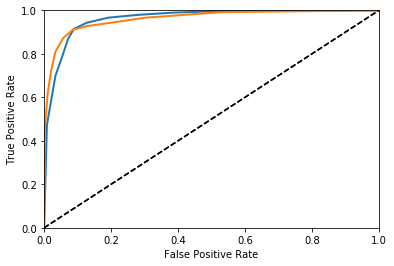

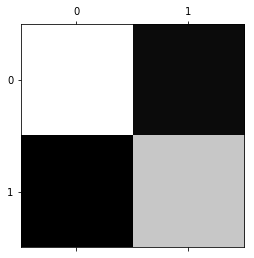

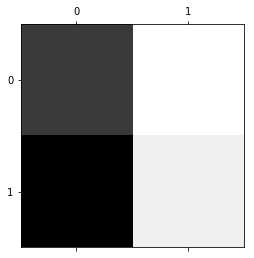

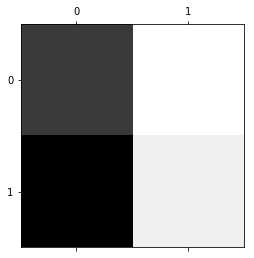

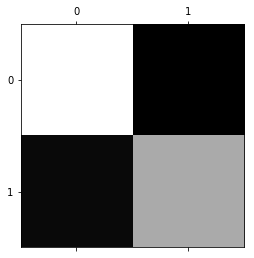

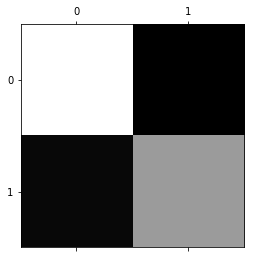

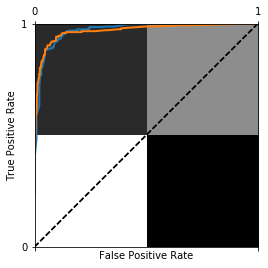

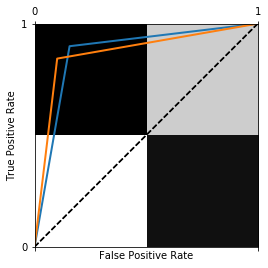

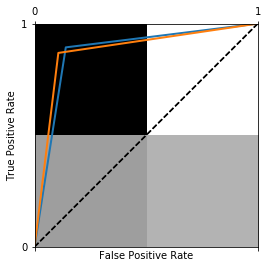

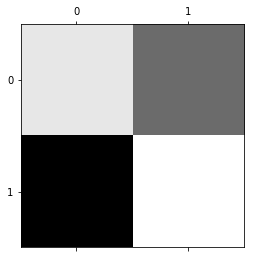

In [18]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

print("-----Random Forest------")
rf = RandomForestClassifier(random_state=13)

do_test_forest(rf)

print("-----OvO Classifier Random Forest------")

rf = OneVsOneClassifier(rf)
do_test_forest_ovo(rf)

print("-----OvR Classifier Random Forest------")

rf = OneVsRestClassifier(rf)
do_test_forest_ovo(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_svm(knn)

print("-----Neural Network-----")
nn = MLPClassifier(max_iter=1000)
do_test_svm(nn)

print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)
